In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [ ]:
import gradio as gr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
from importlib import reload
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder, StandardScaler
import seaborn
import pickle
import json

In [ ]:
df = pd.read_csv('/content/smoke_detection_iot.csv')

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
'''Features:
UTC : Time Stamp of sample collected
Temperature: Temperature of atmosphere in celsius (inc)
Humidity: Humidity percent in air (dec)
TVOC : Total volatile Organic Compunds - carbon compounds having high vapor pressure in air measured in ppb(inc)
eCO2: CO2 equivalent, measures the concentration of all GHGs in ppm (inc)
Raw H2: highly flammable
Raw Ethanol: presence of ethanol in surrondings, flammable at temperatures above 12 celsius
pressure : atmospheric pressure measured in hectopascal, thermal explsosions under closed conditions increase pressure
Incase of wildfires, PM concentration increses.
PM 1.0: particulate matter with diameter less than 1 MICRON includes fine dust
PM 2.5 : particulate matter with size less than 2.5 micron
NC: number concentraction of particulate matter.
CNT: sample number in each class
'''

'Features:\nUTC : Time Stamp of sample collected\nTemperature: Temperature of atmosphere in celsius (inc)\nHumidity: Humidity percent in air (dec)\nTVOC : Total volatile Organic Compunds - carbon compounds having high vapor pressure in air measured in ppb(inc)\neCO2: CO2 equivalent, measures the concentration of all GHGs in ppm (inc)\nRaw H2: highly flammable \nRaw Ethanol: presence of ethanol in surrondings, flammable at temperatures above 12 celsius\npressure : atmospheric pressure measured in hectopascal, thermal explsosions under closed conditions increase pressure\nIncase of wildfires, PM concentration increses.\nPM 1.0: particulate matter with diameter less than 1 MICRON includes fine dust\nPM 2.5 : particulate matter with size less than 2.5 micron\nNC: number concentraction of particulate matter.\nCNT: sample number in each class\n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
df.drop(['UTC', 'CNT'], axis = 1, inplace  = True)
df

,Unnamed: 0,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [ ]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

Large number of samples for label 1

In [ ]:
n = df['Fire Alarm'].value_counts()[0] + df['Fire Alarm'].value_counts()[1]
n0 = df['Fire Alarm'].value_counts()[0]
n1 = df['Fire Alarm'].value_counts()[1]

p_0 = n0 / n
p_1 = n1 / n

print("Probliblity a priori for class\t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))

Probliblity a priori for class	 0 : 0.285	 1: 0.715


In [ ]:
# basic = hyp.load('/content/smoke_detection_iot.csv')
# basic.plot(fmt='.')

# Correlation Matrix


In [ ]:
df

,Unnamed: 0,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 6.7 MB


In [ ]:
# df.drop(df.columns[9], axis = 1, inplace = True)
# df

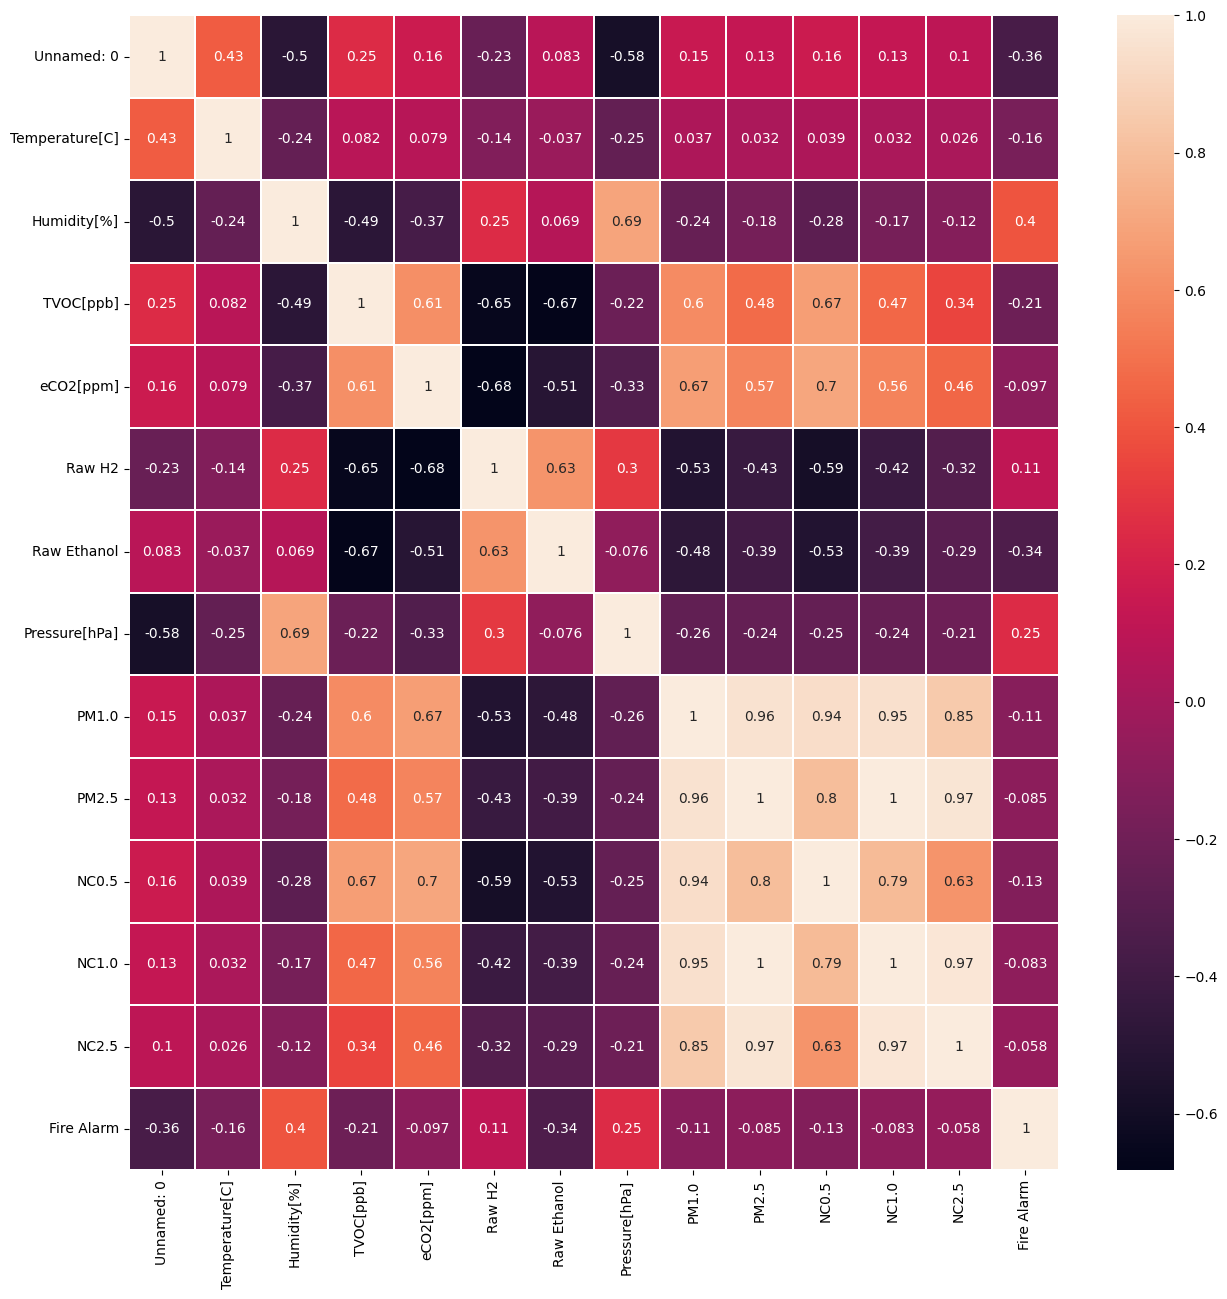

In [ ]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
seaborn.heatmap(correlation, annot = True, linewidths = .3)
plt.show()

In [ ]:
df.drop(['Unnamed: 0', 'PM2.5', 'eCO2[ppm]', 'NC1.0', 'NC2.5', 'Raw H2'], axis = 1, inplace  = True)
df

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,Fire Alarm
0,20.000,57.36,0,18520,939.735,0.00,0.00,0
1,20.015,56.67,0,18651,939.744,0.00,0.00,0
2,20.029,55.96,0,18764,939.738,0.00,0.00,0
3,20.044,55.28,0,18849,939.736,0.00,0.00,0
4,20.059,54.69,0,18921,939.744,0.00,0.00,0
...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,20569,936.670,0.63,4.32,0
62626,18.653,15.87,612,20588,936.678,0.61,4.18,0
62627,18.867,15.84,627,20582,936.687,0.57,3.95,0
62628,19.083,16.04,638,20566,936.680,0.57,3.92,0


Analyse for feature selection

*PM 1.0 PM 2.5, NC 0.5, NC 1.0, NC 2.5 have high
correlations*
NC1.0 PM 2.5 have correlation 1






In [ ]:
Y = df['Fire Alarm']

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [ ]:
X = df.copy()
X.drop(['Fire Alarm'], axis = 1, inplace  = True)
X


,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],PM1.0,NC0.5
0,20.000,57.36,0,18520,939.735,0.00,0.00
1,20.015,56.67,0,18651,939.744,0.00,0.00
2,20.029,55.96,0,18764,939.738,0.00,0.00
3,20.044,55.28,0,18849,939.736,0.00,0.00
4,20.059,54.69,0,18921,939.744,0.00,0.00
...,...,...,...,...,...,...,...
62625,18.438,15.79,625,20569,936.670,0.63,4.32
62626,18.653,15.87,612,20588,936.678,0.61,4.18
62627,18.867,15.84,627,20582,936.687,0.57,3.95
62628,19.083,16.04,638,20566,936.680,0.57,3.92


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=42)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Elbow Test

In [ ]:
error_rate = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

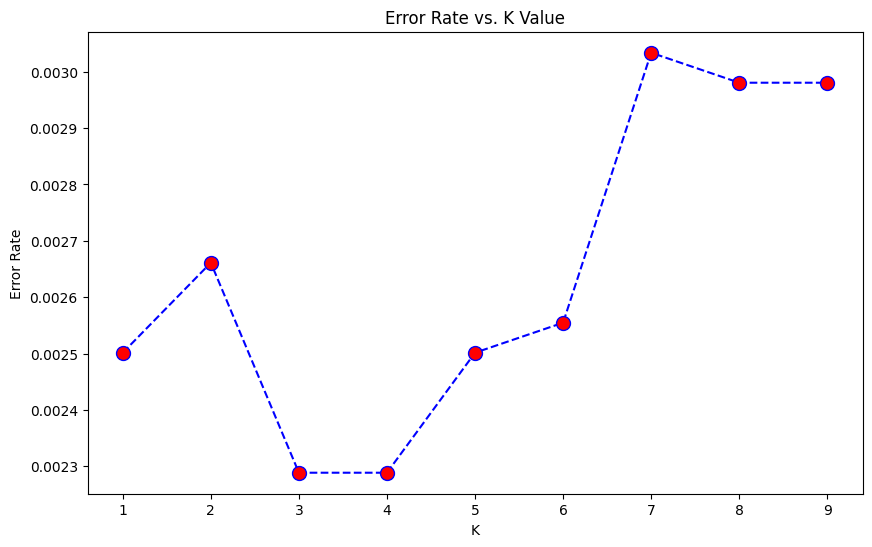

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))



[[ 5412    23]
 [   20 13334]]


In [ ]:
pos = []
for items in y_test.iteritems():
  print(items)

Streaming output truncated to the last 5000 lines.
(60038, 0)
(41244, 1)
(57171, 0)
(26566, 0)
(57741, 0)
(19067, 1)
(10458, 1)
(3036, 0)
(47341, 1)
(27828, 0)
(61618, 0)
(1682, 0)
(16954, 1)
(26335, 0)
(18360, 1)
(6915, 1)
(42202, 1)
(4547, 1)
(32497, 1)
(30665, 1)
(34711, 1)
(44492, 1)
(52343, 0)
(42906, 1)
(57182, 0)
(24483, 1)
(36339, 1)
(18236, 1)
(7558, 1)
(30243, 1)
(41145, 1)
(3252, 1)
(55640, 0)
(39057, 1)
(34989, 1)
(47938, 1)
(9192, 1)
(47778, 1)
(26845, 0)
(45284, 1)
(13010, 1)
(55162, 0)
(1343, 0)
(19036, 1)
(55663, 0)
(46508, 1)
(49567, 1)
(28713, 1)
(10201, 1)
(34842, 1)
(6892, 1)
(41431, 1)
(50240, 1)
(35697, 1)
(52026, 0)
(23201, 1)
(8443, 1)
(48325, 1)
(31549, 1)
(12797, 1)
(44046, 1)
(57524, 0)
(45112, 1)
(31393, 1)
(58064, 0)
(2290, 0)
(53548, 0)
(33466, 1)
(17975, 1)
(25797, 0)
(16253, 1)
(9848, 1)
(413, 0)
(18083, 1)
(2143, 0)
(47240, 1)
(41827, 1)
(478, 0)
(25636, 0)
(34415, 1)
(18586, 1)
(27224, 0)
(34225, 1)
(50020, 0)
(20212, 1)
(62377, 0)
(38747, 1)
(33031, 1

In [ ]:
for out in pred:
  print(out)

Streaming output truncated to the last 5000 lines.
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1

In [ ]:
pred

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
X_pred_1 = X_test[pred == 1]

In [ ]:
X_pred_1

array([[ 0.37336756,  0.38235668, -0.23154196, ...,  0.79789845,
        -0.10844271, -0.11434722],
       [ 0.57999142,  0.59135623, -0.08376583, ...,  0.10863228,
        -0.10728603, -0.11260355],
       [ 0.17230934,  0.93140414, -0.20349127, ...,  0.50067123,
        -0.10912374, -0.11537596],
       ...,
       [-2.23885881,  0.56424277, -0.07114302, ...,  0.04316704,
        -0.10739413, -0.11277815],
       [-1.66392969,  0.69642086, -0.24505729, ...,  0.78134402,
        -0.10699415, -0.1121694 ],
       [-1.43079955,  1.40927878, -0.16065022, ...,  0.39682982,
        -0.10655094, -0.1115111 ]])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy ", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test,pred))

Accuracy  99.77114268987172
[[ 5412    23]
 [   20 13334]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



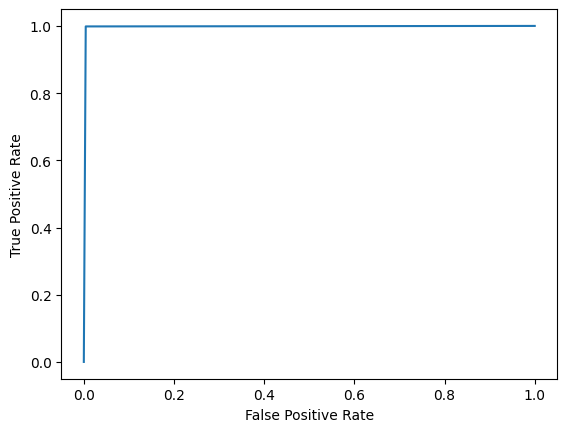

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
with open('smokeDetector.pkl', 'wb') as file:
    pickle.dump(knn, file)


In [ ]:
model = pickle.load(open('smokeDetector.pkl', 'rb'))


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   Raw Ethanol     62630 non-null  int64  
 4   Pressure[hPa]   62630 non-null  float64
 5   PM1.0           62630 non-null  float64
 6   NC0.5           62630 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 3.3 MB


In [ ]:
Temperature = gr.inputs.Number(label = 'Current Temperature')
Pressure = gr.inputs.Number(label = 'Atmospheric Pressure')
TVOC = gr.inputs.Number(label = 'TVOC level')
Humidity = gr.inputs.Number(label = 'Humidity')
PM1 = gr.inputs.Number(label = 'PM1.0')
NC05 = gr.inputs.Number(label = 'NC0.5')
RawEthanol = gr.inputs.Number(label = 'Raw Ethanol')
output = gr.outputs.Textbox(label='Fire Trigger')

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [ ]:
def predict(temp, humid, tvoc, eth, pressure, pm, nc):
    sample = np.array([temp, humid, tvoc, eth, pressure, pm, nc]).reshape(1, -1)
    sample_std = std.transform(sample)
    # sample = pd.DataFrame({"Temperature[C]": [temp], "Humidity[%]": [humid], "TVOC[ppb]": [tvoc], "Raw Ethanol" : [eth], "Pressure[hPa]" : [pressure], "PM1.0" : [pm], "NC0.5" : [nc]})
    prediction = knn.predict(sample_std)
    # print(sample, prediction)
    if prediction[0] == 1:
      text = "Trigger Fire Alarm"
      background_image = "https://www.shumanlegal.com/wp-content/uploads/2022/09/Fire-Accidents.jpg"
    else:
      text = "No fire"
      background_image = "https://images.pexels.com/videos/3045163/free-video-3045163.jpg?auto=compress&cs=tinysrgb&dpr=1&w=500"
    return text, background_image


In [ ]:
ans = predict(24.61, 53.2, 1159, 19440,938.783, 1.53, 10.54)
ans

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Trigger Fire Alarm'

In [ ]:
gr.Interface( fn=predict,
              inputs= [Temperature,Humidity,TVOC, RawEthanol, Pressure,PM1, NC05],
              outputs=output,  overrides={
                         "css": f"body {{background-image: url('https://www.shumanlegal.com/wp-content/uploads/2022/09/Fire-Accidents.jpg');}}"
                     }).launch(share = True)


/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'overrides': {'css': "body {background-image: url('https://www.shumanlegal.com/wp-content/uploads/2022/09/Fire-Accidents.jpg');}"}}
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://56e661621a23a2656f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
